# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [13]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
# COMMENT: Std Deviation for the population, i.e. without Bessel's correction}
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **  
Using only my intuition I expect the following relationships to hold: 
* **RM** and **MDEV** should be positively correlated, i.e. the higher the number of rooms of a property, the higher its median value. My reasoning stems from the idea that the value of a property is determined (together with other factors) by its surface. Although more rooms may not translate, necessarily, into a bigger surface (e.g. a lot of small rooms vs fewer bigger rooms), it will in most cases. 
 
 
* **LSTAT** and **MDEV** should be negatively correlated. A higher proportion of lower class workers in a neighborhood should imply - according to my thinking - that the value of the area is lower, thus a lower value of its properties. My thinking is the following: ceteris paribus (i.e. same type of house), the properties in a **better** neighborhood should have a higher value. A higher proportion of lower class workers means a lower income pool in the neighborhood. This can translate into a lower consumption per individual in the area, thus leading to the development of lower class business/services (that lower class workers can afford) and/or the closure/move of higher-class businesses/services. On the other way, due to the higher values of properties of better neighborhoods, lower class workers would not be able (given their lower incomes) to live in such a neighborhood, thus contributing to a lower LSTAT statistic. In this case I am not really sure if the relationship between LSTAT and MDEV is a chicken-and-egg problem, i.e. "property value diminishes as more lower class workers move to the neighborhood, or a better neighborhood forces lower class workers move somewhere else (due to the higher cost of properties)"? - I still expect to see a negative correlation anyway. 
 
 
* **PTRATIO** and **MDEV** should be negatively correlated. My assumption is that PTRATIO is a proxy to represent the quality of a neighborhood. This might be a stretch, but I assume that good schools in a neighborhood should increase the value of the neighborhood's properties. Now, good schools **may** show a better (i.e. lower) students-to-teachers ratio. Said that, I recognise that PTRATIO is not the only thing that makes schools better. For example, if teachers are not great, having more of them (thus lowering the PTRATIO) might not make that school necessarily better.


Please notice that when I use the word *correlated* I am not necessarily referring to linear correlation.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [18]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [19]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**  
The model has an R^2 score of 0.923, i.e. 92.3% of the variance of the dependent variable can be explained by the model. In general, I would say that this is a pretty high score, so I would consider the model to have successfully captured the variation of the target variable.

However, I have a couple of remarks: 

1. This R^2 score taken in isolation, while being a pretty high number, does not tell me how good the model is. For example, if state-of-the-art models (for the same task) achieve, on average, an R^2 score greater than 99.7%, then this model is not very good. I would need more terms of comparison to fully judge if the model is successful or not.
 
2. While the model can be considered successful at "capturing the variation of the target variable", it may not be necessarily good at predicting new data points (especially given the extremely small sample size).

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **  
Splitting a dataset into training and testing subsets allows for an independent evaluation of a regression model. The rationale relies on the fact of validating the performance of a model on a set of data points it has never seen (i.e. the testing dataset). If this splitting is not done, the model will learn from a single dataset, but it will be impossible for the creator of the model to compare its performance against new data. 
 
The train/test splitting lets the user identify those contexts in which the model results in either being overfitted or underfitted against a given dataset. The ultimate objective is to create a model that is capable of extracting as much information from training data (thus not underfitting), while performing good when it generalises to unseen data (thus not overfitting).

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

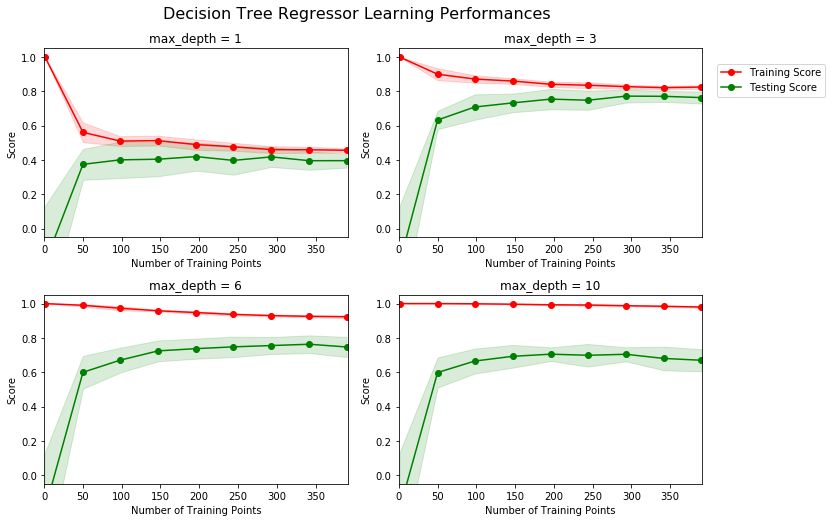

In [25]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **  
I am replying to this question by choosing the second model, i.e. that with **`max_depth = 3`**.   
As more training points are added, the training curve seems to converge to a specific value. Similarly, as more training data points are added, the testing curve seems plateauing to a certain value.  
In the case selected, it seems that the score for the training dataset converges to approximately 0.8 (i.e. the model is able to capture 80% of the variability of the dependent variable). For the testing dataset, performance is likely to be around 75%.  
Adding more training points, in general, should benefit the model. In common words, a wider training dataset allows the model to "learn" more realisations of the data universe thus making the model itself more prepared to deal with unseen data. However, if the training and testing curves already converge (as in the case selected), and the testing score is acceptable, adding more training points would simply marginally improve the model. While this may still be desirable, it could be offset but the additional training time/computational power required to learn from a larger training dataset.  
In the cases of the two models at the bottom, on the contrary, adding new training points would definitely be beneficial. Both models (`max_depth = 6` and `max_depth= = 10` respectively) are more complex than the one selected (i.e. the decision tree allows for more levels of branch-splitting). In these two cases, it is evident how the training curve is much higher, i.e. the model does really well on the training dataset, but it is not able to replicate a similar performance on the testing dataset (thus overfitting and failing to generalise).

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

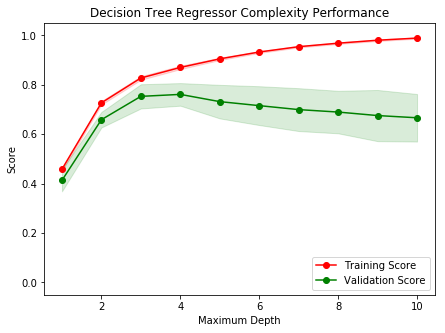

In [26]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **  
When the model is trained with `max_depth = 1`, it suffers from high bias. The model is not complex enough to learn any meaningful pattern in the training data and the performance is pretty low (R^2 score approximating 45%). 
  
In the case of training with `max_depth = 10`, the model becomes much more complex, i.e. it can pick up subtler nuances in the training data. However, this model suffers from high variance, i.e. predictions on testing data points do vary significantly. This results in a model which is overfitted to the training data. There are at least two visual clues that highlight this phenomenon. In the case of `max_depth = 10`, the performance on the training dataset (very close to 1.0) is much larger than that on the testing dataset (around 0.7). The model captures most of the variability in the training dataset, but it fails to generalise to unseen data. Secondly, the range of the shaded region for the point corresponding to `max_depth = 10` is much wider; this exactly represents a higher degree of variance.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **  
A model that best generalises to unseen data is the one where "the level of complexity at which the increase in bias is equivalent to the reduction in variance", as wonderfully described by Scott Fortmann-Roe in [this](http://scott.fortmann-roe.com/docs/BiasVariance.html) post. In other words, this optimal model is complex enough so that it can learn meaningful patterns in data while being capable of producing consistent results when predicting/classyfing on unseen data.  
In the case at hand, I think that the best model is that with a `max_depth = 3`. The performance metric on the testing dataset reaches the maximum (approx 75%). The model is complex enought to learn patterns from the training dataset (R^2 score above 0.8) and generalises well to unseen data.  
A model with `max_depth = 4` achieves a similar performance (while fiting more the training dataset). In practice, the two models are pretty similar. However, I believe that if a less complex model achieves similar performances, then it has to be preferred (less time to train/execute it).

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **  
As the name suggests, *grid search* allows to searching for the best combination of hyperparameter values for a given model, with the aim of maximsing a certain metric score.  
For example, suppose you have a model with two hyperparameters, and you have two possible values for each of them. In theory, you can create four possible versions of the model (a 2x2 grid) given the various combinations of hyperparamenters. Grid search will cross-validate the model in all the four cases and identifies the best option, i.e. the one with the highest performance metric.  
  
This can be used as a technique to optimise a model, i.e. choosing the best combination of its hyperparameters.  
In the example above, grid search would help choosing `max_depth` hyperparameter value that guaratees, for example, the highest R^2 score.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **  
**K-fold cross-validation** is a way to split a dataset into training and testing sets, making sure that every data point will be used both for training and testing, thus maximising the "learning potential" of the dataset itself.  
In pratice, a dataset is split into k equally sized sets. Then, for k times, a model is trained on k-1 sets and tested on the remaining set (the testing set is different every time).  
  
This technique is really beneficial in otpimisation strategies such as GridSearch and/or Random search. For example, suppose you are looking for the best combination of two hyperparamenters for a certain regression model. Now, if you split the dataset into training and testing only one way, the optimal combination of hyperparameters might be due to the actual - unintentional - train/test splitting. By repeating this k-times, we can be more confident on the model chosen. K-fold allows to virtually expand the data points using the validate the model (i.e. data points are used both for training and testing), thus increasing the confidence in choosing the optimal configuration of the regression model.
  
Also, I would like to stress the fact that the original dataset should be split into three: a training set, a validation set and a testing set. Tweaks to the hyperparamenters should be done only by referring to changes in the performance on the validation set, while the testing set should always be kept as an unseed, independent group of data points. It is not a case that k-fold is a *cross-validation* technique and not a cross-testing one :)

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [33]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, 
                        param_grid=params, 
                        scoring=scoring_fnc, 
                        cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [34]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **  
It seems that the best regression model is the decision tree with `max_depth = 4`. In question 6 I said that `max_depth = 3` would have been the best value for the hyperparamenter. In fairness, the two options looked pretty close and I am quite sure that `max_depth = 3` should achieve similar results. And I also said that the two options (i.e. 3 or 4) looked pretty similar. I am not changing my answer to question 6 :)

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [36]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **  
Using the model, the prices I would recommend each client to sell his/her home at are:
- USD 403,025.00 for Client 1
- USD 237,478.72 for Client 2 
- USD 931,636.36 for Client 3 
  
*I would actually round those prices to the nearest multiple of 5*.

To answer the second part of this question, I would like to double check the features of the "best" and "worst" houses in Boston (i.e. the properties with highest and lowest value).

In [53]:
print features.iloc[prices.argmax(),:]
print '\nValue of this property is: {}'.format(prices.max())

RM          8.398
LSTAT       5.910
PTRATIO    13.000
Name: 253, dtype: float64

Value of this property is: 1024800.0


The most expensive property in the original dataset had more than 8 rooms and was located in a neighborhood whose percentage of lower class workers was approximately 6% and the student-to-teacher ratio was 13. This is in line with the features of Client 3's property. In the original dataset, the most valuable property has a value of USD 1,024,800. For Client 3's property, our model predicts a value of USD 931,636.36. Given the fact that Client 3' property has a better LSTAT ratio and a lower (thus better) PTRATIO, I would have expected the model to predict a higher value.

In [59]:
print features.iloc[prices.argmin(),:]
print '\nValue of this property is: {}'.format(prices.min())

RM          5.453
LSTAT      30.590
PTRATIO    20.200
Name: 381, dtype: float64

Value of this property is: 105000.0


Similarly, the least valuable property in the original dataset showed similar features to those of the property of Client 2. Actually, Client 2's property has less rooms (4 vs 5), its neighborhood as a higher percentage of lower class workers (32 vs 30.59) and a higher, thus worse, student-to-teacher ratio (22 vs 20.2). The least valuable property in the dataset has a median value of USD 105,000.00 while, for Client 2's property, our model predicts a value of USD 237,478.32.  
  
At first sight, it might seem that our model is **not doing very well with extreme values**. In particular, "worse" properties seem to be valued higher and "better" properties seem to be valued lower. This may due to the fact that "extreme" properties (i.e. either too expensive or too cheap) are rare in the dataset and the model had fewer data points to learn this nuances (see price histogram below to confirm my thinking). For properties in the middle, like that of Client 1, the model should have learned well (since we have seen a pretty good R^2 score metric previously).  
  
**Therefore**, I would probably suggest Client 2 to accept a lower price for his property, while Client 3 could be in a position to ask for a higher price for his house.

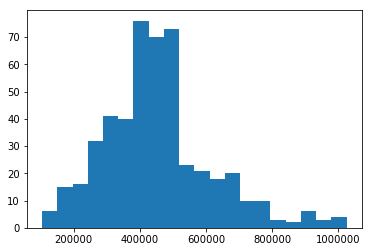

In [79]:
plt.hist(prices, bins=20);

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [109]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **  
While the model could represent a starting point for predicting the value of properties, I would not rely too much on it. Let me concentrate on a some key issues.  
  
First of all, using data from 1978 and converting it to present day using the inflation rate assumes that residential real estate (like the case at hand) would have followed a general inflation rate, which is typically calculated as the average increase/decrease of a bucket of items (which also change over time). This puts the validity of the dependent variable into question.  
Secondly, it seems pretty obvious to me that while LSTAT and PTRATIO could be interestingly valid proxy of the quality of a neighborhood, defining a property by only looking at the number of rooms is overly reductive. There are of course other features (such as quality of appliances, energy efficiency score, materials, amenities, etc. etc.) that do have an impact on the value of a property. As the curse of dimensionality suggests, however, adding independent features would then require increasing the training dataset by an exponential factor, if overfitting is to be avoided/controlled.  
Thirdly, the model would be very much Boston-specific and if a real estate agent operates on a larger area (e.g. including properties in different areas) he/she might need to look for another dataset and train a new model. For example, properties in rural areas (where spaces are wider) might have a higher number of rooms by default. However, these properties may be, in the end, way cheaper than smaller ones in downtown Boston! You may then the area as an additional feature (e.g. urban vs rural), but, again, that would required additional training points.    
Lastly, the model does not take into account price fluctuations due to variation in demand and supply of properties. The value of the same property might change significantly due to factors not related to either the property itself or the neighborood, e.g. recessionary economy, inflation, low employment rate, etc. etc.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.